# Analisi delle reti sociali

<img style="float: right;" src="figures/karate_kid.jpg">

*[Zachary's karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a well-known social network of a university karate club described in the paper [An Information Flow Model for Conflict and Fission in Small Groups](http://www1.ind.ku.dk/complexLearning/zachary1977.pdf) by Wayne W. Zachary.*

## Indice

1. [Rappresentazione di reti binarie indirette](#reti_binarie_indirette)<br>
2. [Algoritimi di *Force-Direction Placements*](#placements)<br>
3. [Matrice di adiacenza](#adiacenza)<br>
4. [Informazioni di nodo](#informazioni_nodo)<br>
5. [Il cammino più corto (*shortest path*)](#shortest_path)<br>
6. [Utili indici descrittivi](#indici)<br>
    6.1 [Indici descrittivi a livello di nodo](#indici_nodo)<br>
    6.2 [Indici descrittivi a livello di rete](#indici_rete)<br>
7. [Community Detection](#detection)<br>
    7.1 [Algoritmo di Girvan-Newman](#girvan_newman)<br>
    7.1 [Metodo di Louvain](#louvain)<br>

# 1. Rappresentazione di reti binarie indirette <a id=reti_binarie_indirette> </a>

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import warnings

from matplotlib.cbook import mplDeprecation
warnings.filterwarnings("ignore", category=mplDeprecation)

### Grafi

**Grafi**, $\mathcal{G} = (\mathcal{N}, \mathcal{A})$

In [2]:
G = nx.karate_club_graph()
print(nx.info(G))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


* Insieme dei nodi $\mathcal{N} = \{1, \dots, V\}$;

### Nodi

In [3]:
N = G.nodes()
print("Nodi: ", N)

Nodi:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


* Un arco è definito come una coppia $\{\{i, j\} : i, j \in \mathcal{N}, i > j\}$;
* Insieme degli archi $\mathcal{A} \subseteq \{\{i, j\} : i, j \in \mathcal{N}, i > j\}$.

### Archi

In [4]:
A = G.edges()
print("Archi: ", A)

Archi:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


# 2. Algoritmi di *Force-Direction Placements* <a id=placements> </a>

Definiscono le posizioni dei nodi utilizzando solo le informazioni sugli archi nella rete con un'interpretazione che deriva dalla **Fisica**. Come?
* **I nodi** sono visti come particelle in un sistema fisico con una certa energia che risulta da due principali forze che agiscono su ogni nodo;
* **Forza repulsiva**: Simile alla forza elettrostatica di **Coulomb**. Agisce su tutti i nodi e genera più energia tanto più i nodi sono vicini;
* **Forza attrattiva**: Simile alla forza della molla di **Hooke**. Agisce solo su nodi connessi e genera più energia tanto più i nodi sono lontani.

Questi algoritmi individuano le posizioni spaziali dei nodi in modo da ottenere la configurazione più stabile nel sistema di particelle (a minor energia).

[spring_layout](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html): *Position nodes using Fruchterman-Reingold force-directed algorithm.*

In [5]:
pos = nx.spring_layout(G, iterations=50, seed=1)

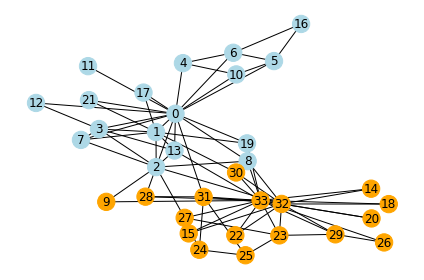

In [6]:
node_color_club = ['lightblue' if N[nodo]['club']=='Mr. Hi' else 'orange' for nodo in N]

nx.draw_networkx(G = G, pos = pos, with_labels=True, node_color = node_color_club)
plt.axis('off')
plt.tight_layout()
plt.show()

# 3. Matrice di adiacenza <a id=adiacenza> </a>

**Matrice di adiacenza**, $Y$
* $Y$ matrice quadrata simmetrica di dimensioni $V \times V$;
* Nodi disposti in riga e colonna;
* $Y_{ij} = Y_{ji} = 1$ se ${i, j} \in \mathcal{A}$ ($i$ e $j$ sono connessi), $0$ altrimenti.

In [7]:
Y = nx.adjacency_matrix(G)
V, V = Y.shape

In [8]:
print("Dimensioni: {} X {}".format(V, V))

Dimensioni: 34 X 34


In [9]:
print("Matrice sparsa: \n{}".format(Y))  # è una matrice sparsa
print("\n Matrice densa: \n{}".format(Y.todense()))

Matrice sparsa: 
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 17)	1
  (0, 19)	1
  (0, 21)	1
  (0, 31)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 7)	1
  (1, 13)	1
  (1, 17)	1
  (1, 19)	1
  (1, 21)	1
  (1, 30)	1
  :	:
  (32, 18)	1
  (32, 20)	1
  (32, 22)	1
  (32, 23)	1
  (32, 29)	1
  (32, 30)	1
  (32, 31)	1
  (32, 33)	1
  (33, 8)	1
  (33, 9)	1
  (33, 13)	1
  (33, 14)	1
  (33, 15)	1
  (33, 18)	1
  (33, 19)	1
  (33, 20)	1
  (33, 22)	1
  (33, 23)	1
  (33, 26)	1
  (33, 27)	1
  (33, 28)	1
  (33, 29)	1
  (33, 30)	1
  (33, 31)	1
  (33, 32)	1

 Matrice densa: 
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


### Esempio

Calcolare la matrice di adiacenza $Y$ a partire dal grafo $G$ (vedi definizione sopra).

In [14]:
x = 
print(x)

SyntaxError: invalid syntax (<ipython-input-14-220958ede17b>, line 1)

In [ ]:
# Compressed Sparse Row matrix
from scipy.sparse.csr import csr_matrix

row_ind = []
col_ind = []

for arco in A:
    row_ind.extend(list(arco))
    col_ind.extend(list(arco)[::-1])
    
print(row_ind)
print(col_ind)
    
# row_ind e col_ind sono ordinati in modo tale che ciascuna arco sia rappresentato sia come (a,b) che come (b,a)
    
# help(csr_matrix)
# creiamo la matrice sparsa nella forma:
# csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
#           where ``data``, ``row_ind`` and ``col_ind`` satisfy the
#           relationship ``a[row_ind[k], col_ind[k]] = data[k]``.

Y = csr_matrix(([1]*len(row_ind), (row_ind, col_ind)), shape=(V, V))
print(Y)
print(Y.todense())

# 4. Informazioni di nodo <a id=informazioni_nodo> </a>

### club

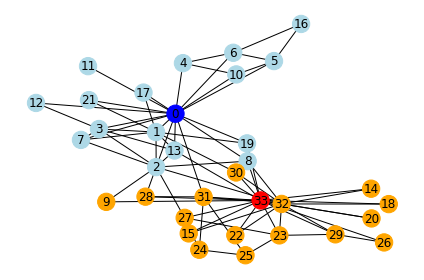

In [15]:
node_color_club[0] = 'blue'
node_color_club[33] = 'red'

nx.draw_networkx(G = G, pos = pos, with_labels=True, node_color = node_color_club)
plt.axis('off')
plt.tight_layout()
plt.show()

# 5. Il cammino più corto (*shortest path*) <a id=shortest_path> </a>

* Per ogni coppia di nodi $i$ e $j$ gli *shortest paths* sono i cammini più corti tra nodi interconnessi che uniscono $i$ a $j$;
* Possono essere molteplici;
* Lunghezza dello *shortest path*: numero di archi di cui si compone.

### Esercizio

Utilizzare le funzioni `shortest_path()` e `shortest_path_length()` della libreria NetworkX (già importata come `nx`) per:
1. Identificare il cammino più corto tra Mr. Hi e Officer;
2. Calcolare la lunghezza del cammino più corto.

In [ ]:
help(nx.shortest_path)

In [ ]:
shortest_path = None
shortest_path_length = None

try:
    print("Cammino più corto tra Mr. Hi e Officer:", shortest_path); 
except Exception as exc:
    raise Exception("Valori non calcolati") from exc
    
try:
    print("Lunghezza del cammino più corto tra Mr. Hi e Officer:", shortest_path_length)
except Exception as exc:
    raise Exception("Valori non calcolati") from exc
    

Un esempio di utilizzo di algoritmo per il calcolo del cammino più corto ispirato alla [teoria dei sei gradi di separazione](https://it.wikipedia.org/wiki/Sei_gradi_di_separazione): [The Oracle of bacon](https://oracleofbacon.org/).

# 6. Utili indici descrittivi <a id=indici> </a>

## 6.1 Indici descrittivi a livello di nodo <a id=indici_nodo> </a>

### Grado di un nodo

* Grado di *i*. Numero di nodi con cui è connesso: $d_i = \sum_{j=1}^{V}Y_{ij}$.

In [ ]:
d_mr_hi = G.degree(0)
print("Grado del nodo associato a Mr. Hi: {}".format(d_mr_hi))

In [ ]:
# disegnamo un istogramma del grado dei nodi del nostro grafo
#print(G.degree()) # è una lista di tuple

# è più facile manipolare questo oggetto se lo trasformo in un dizionario (chiave: valore)
print(dict(G.degree()).keys())
print(dict(G.degree()).values())

In [ ]:
plt.hist(dict(G.degree()).values())
plt.title("Istogramma dei gradi")
plt.xlabel('Grado')
plt.ylabel('Frequenza')
plt.show()

### Esercizio

Calcolare il grado del nodo *Mr. Hi* a partire dalla matrice di adiacenza $Y$ (vedi definizione sopra).

In [ ]:
# il grado di un nodo i è calcolabile dalla matrice di adiacenza Y sommando sulla riga i-esima 
# d_mr_hi = ...

# o sulla colonna i-esima ... d_mr_hi = Y.todense()[:,0].sum()

print("Grado del nodo associato a Mr. Hi: {}".format(d_mr_hi))

### *Betweenness*

* Livello di *betweenness* di $i$. È la somma (fatta su tutte le coppie di nodi $u$ e $v$ diversi da $i$) del rapporto tra il numero degli *shortest paths* tra $u$ e $v$ che passano per $i$, $n_{uv}(i)$, ed il totale degli *shortest paths* tra $u$ e $v$, $n_{uv}$: $g_i = \sum_{u \neq i \neq u}\frac{n_{uv}(i)}{n_{uv}}$.


[betweenness_centrality](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html): *Compute the shortest-path betweenness centrality for nodes. Betweenness centrality of a node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$*.

* **k** (int, optional (default=None)) – If k is not None use k node samples to estimate betweenness. The value of k <= n where n is the number of nodes in the graph. 

In [ ]:
g = nx.betweenness_centrality(G)
print("Livelli di betweenness per ogni nodo di G: \n", g)

# chiaramente, i nodi con maggior betweenness sono 0 e 33
print("\nNodi ordinati per betweenness decrescente: \n", sorted(g.items(), key=lambda x:x[1], reverse=True))

### Esercizio

Ricavare a partire dal dizionario `g` il livello di *betweenness* di Mr. Hi.

In [ ]:
# betweenness_mr_hi = ...

try:
    print("Betweenness del nodo \"Mr. Hi\": {:.2f}".format(betweenness_mr_hi))
except Exception as exc:
    raise Exception("Valori non calcolati") from exc

In [ ]:
plt.title("Istogramma della betweenness")
plt.hist(g.values())
plt.xlabel('Betweenness')
plt.ylabel('Frequenza')
plt.show()

In [ ]:
############ rappresentazione del grafo con nodi proporzionali alla betweenness
# useremo la classe MinMaxScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# è una classe con metodo fit_transform, che useremo per riscalare i nodi con dimensione tra 100 e 1000

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((100, 1000))

btw_values = np.array(list(g.values()))

# che parametri passiamo? vuole una lista o un np.array
node_size_betweenness = scaler.fit_transform(btw_values.reshape(-1, 1))

print(node_size_betweenness)

# ora disegnamo il grado passando come parametro la dimensione dei nodi

In [ ]:
plt.title("Rappresentazione nella rete dei diversi livelli di betweenness")
nx.draw_networkx(
    G, 
    pos=pos,
    with_labels=True,
    node_color=node_color_club,
    node_size=node_size_betweenness
)
plt.axis('off')
plt.tight_layout()
plt.show()

## 6.2 Indici descrittivi a livello di rete <a id=indici_rete> </a>

### Densità del grafo

* Densità di $G$. Frequenza relativa del numero totale di archi osservati, sul totale degli archi possibili: $D = \frac{1}{V(V - 1)}\sum Y_{ij}$;

In [ ]:
D = nx.density(G)

print("Densità del grafo G: ", D)

## Esercizio
Calcolare la densità del grafo $G$ a partire dalla matrice di adiacenza $Y$ (vedi definizione sopra).

In [ ]:
raise(NotImplementedError)
D_calc = None

print("Densità del grafo G: {:.2f}".format(D_calc))

### Diametro del grafo

* Diametro di $G$. Lunghezza del più lungo *shortest path*;

In [ ]:
DiamG = nx.diameter(G)

print("Diametro del grafo G: {}".format(DiamG))

* Lunghezza media di *shortest path*. Media delle lunghezze minime di *path*. $L = \frac{1}{V(V - 1)}\sum s_{ij}$.

In [ ]:
L = nx.average_shortest_path_length(G)
print("Lunghezza media di shortest path del grafo G: {:.2f}".format(L))

### Misure di omofilia - Modularità

La modularità è una funzione usata nell'analisi dei grafi o delle reti (es. reti di computer o social network). 
Il suo valore quantifica la qualità della divisione della rete in moduli o comunità. Una buona suddivisione possiede alti valori di modularità; all'interno dei moduli la densità sarà alta ma fra un modulo e l'altro ci saranno pochi collegamenti e quindi una densità inferiore.

* Modularità. Frazione di archi che connette nodi dello stesso tipo meno il valore atteso della stessa quantità in una rete con connessioni casuali: $Q = \sum_k^K (e_{kk} - a_k^2)$, dove $e_{kk}$ rappresenta la frazione degli archi completamente contenuti nella comunità $k$ e $a_k$ è la frazione delle estremità degli archi contenuti nella comunità $k$.

Nota: Nella rete con connessioni casuali ogni nodo viene vincolato a mantenere il suo grado, in pratica è come se si tagliasse ogni arco in due e ogni mezzo arco, chiamato *stub*, venisse ricablato casualmente con qualsiasi altro *stub* nella rete. Se $a^\star_k$ è il numero di *stub* nella comunità $k$, il numero di possibili archi contenuti nella comunità $k$ (consentendo *self loops*) è ${a^\star_k}^2$, il valore atteso degli archi contenuti nella comunità $k$ è quindi ${{a^\star_k}^2}/{l^2}$ dove $l$ è il numero di *stub* nella rete. Visto che $a_k = {{a^\star_k}/{l}}$, il valore atteso degli archi contenuti nella comunità è anche pari a $a_k^2$.

Definiamo un grafo come quello in figura e ne calcoliamo la modularità. 

<img style="float: center;" src="figures/rete_piccola.png">

In [ ]:
archi_esempio = [[1, 2], [1, 3], [2, 3], [4, 5], [4, 6], [5, 6], [2, 5]]

In [ ]:
G_esempio = nx.make_small_graph(["edgelist", "Esempio di rete", 6, archi_esempio])
pos_esempio = nx.spring_layout(G_esempio)
part_esempio = {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1}
node_color_esempio = ['lightblue' if (part_esempio[nodo] == 0) else 'orange' for nodo in G_esempio.nodes()]

nx.draw_networkx(
    G_esempio, 
    pos=pos_esempio,
    node_color=node_color_esempio,
    with_labels=True
)
plt.title("Esempio di rete")
plt.axis('off')
plt.tight_layout()

### Esercizio - calcolo della modularità

1. Definire una nuova rete come quella in figura e calcolarne la modularità.
2. Provate ad eliminare l'arco (2,3). Come si modifica la modularità?
<img style="float: center;" src="figures/rete_3_comunita.png">

In [ ]:
#help(nx.make_small_graph)

G2 = nx.make_small_graph(["edgelist", "Rete2", 10, [[1,2],[1,3],[2,3],[3,4],[4,5],[4,6],[5,6],[3,8],[5,8],[7,8],[8,9],[7,10],[9,10],[8,10]]])


In [19]:
import community
import pandas as pd

# 7. Community Detection <a id=detection> </a>

**Obiettivo**: Dividere la rete in comunità di nodi, in modo che nodi all'interno di ogni comunità abbiano molte connessioni tra loro (rete densa), mentre nodi in comunità diverse siano poco connessi (rete sparsa). Esistono vari approcci:
* **Algoritmo di Girvan-Newman**: basato sulla *betweenness* di arco;
* **Metodo di Louvain**: ottimizzazione della modularità;
* E altri ...

## 7.1 Algoritmo di Girvan-Newman <a id=girvan_newman> </a>

In [20]:
communities = next(nx.community.girvan_newman(G))
# nx.community.girvan_newman è un oggetto di tipo generator
# si veda https://wiki.python.org/moin/Generators
# E' un oggetto iterabile che ritorna un elemento alla volta (con la funzione next()) anziché la lista completa. 
# Viene utilizzato per ottimizzare l'uso della memoria.


In [17]:
help(community.modularity)

NameError: name 'community' is not defined

In [21]:
print(communities)

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})


In [22]:
part_girvan_newman = dict()
id_comm = 0

for comm in communities:
    for node in comm:
        part_girvan_newman.setdefault(node, id_comm)
    id_comm += 1


In [23]:
print(part_girvan_newman)

{0: 0, 1: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 10: 0, 11: 0, 12: 0, 13: 0, 16: 0, 17: 0, 19: 0, 21: 0, 2: 1, 8: 1, 9: 1, 14: 1, 15: 1, 18: 1, 20: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1}


In [24]:
Q_girvan_newman = community.modularity(part_girvan_newman, G)
print("Modularità, comunità identificate con Girvan-Newman (n = 2): {:.2f}".format(Q_girvan_newman))

AttributeError: module 'community' has no attribute 'modularity'

## 7.2 Metodo di Louvain <a id=louvain> </a>

**Metodo di Louvain**
1. L'algoritmo è inizializzato mettendo ogni nodo in una comunità diversa;
2. Per ogni nodo $i$ si calcola il guadagno in modularità $\Delta Q_{i:i \rightarrow C_j}$ ottenuto nello spostare $i$ dalla sua comunità a quella di ogni nodo $j$ connesso ad $i$;
3. Il nodo $i$ viene messo nella comunità con maggiore incremento in modularità se l'incremento è positivo. Altrimenti rimane nella sua comunità. Questo processo è applicato in ripetizione e sequenzialmente a tutti i nodi fino a quando la modularità non aumenta più;
4. Le comunità vengono raggruppate a formare una nuova rete (pesata con *self loops*) in cui le comunità sono i nuovi nodi e i nuovi pesi degli archi sono dati dal numero totale di archi che connettono i nodi nelle due comunità;
5. Torna a 2. e riapplica il procedimento alla nuova rete tra comunità.

In [25]:
part_louvain = community.best_partition(G)
print(part_louvain)

AttributeError: module 'community' has no attribute 'best_partition'

In [ ]:
Q_louvain = community.modularity(part_louvain, G)
print("Modularità, comunità identificate con Louvain: {:.2f}".format(Q_louvain))

In [ ]:
# Comparazione tra i due metodi di identificazione delle community

node_color_girvan_newman = ['lightgreen' if (nodo in communities[0]) else 'yellow' for nodo in N]
node_color_louvain = list(part_louvain.values())

plt.figure(figsize=(12, 8))

plt.subplot(221)

nx.draw_networkx(
    G, 
    pos=pos,
    with_labels=True,
    node_color=node_color_club,
    node_size=node_size_betweenness
)
plt.title("I due club")
plt.axis('off')
plt.tight_layout()

plt.subplot(222)

nx.draw_networkx(
    G, 
    pos=pos,
    with_labels=True,
    node_color=node_color_girvan_newman,
    node_size=node_size_betweenness
)
plt.title("Comunità trovate usando l'algoritmo di Girvan-Newman (n = 2)")
plt.axis('off')
plt.tight_layout()

plt.subplot(223)
plt.text(0.5, 0.6, "Community Detection", size=30, ha="center", va="center")
plt.axis('off')
plt.tight_layout()

plt.subplot(224)

nx.draw_networkx(
    G, 
    pos=pos,
    with_labels=True,
    cmap=plt.get_cmap("Set2"),
    node_color=node_color_louvain,
    node_size=node_size_betweenness
)
plt.title("Comunità trovate usando il metodo di Louvain")
plt.axis('off')
plt.tight_layout()

plt.show()

In [ ]:
nx.write_gexf(G, "./karate_network.gexf")